In [1]:
import numpy as np 
from ecg_base import generateBaseEcg 

In [2]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
T = [[282.660,	87.180,	30.640,	11.120,	177.252],
     [264.160,	88.000,	15.400,	1.000,	248.027]]
S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
        [50.571,	20.580,	14.110,	5.676,	46.880]]
Lengths = [300,88,48,77,429]
C = [[0.011,-0.04,-0.27,0.017,-0.001],
     [0,0,0,0,0]]


In [4]:
signal = generateBaseEcg(Lengths,A,T,S,C)


In [5]:
print(signal.shape)
signal1 = smooth(signal,10)
print(signal1.shape)

(942,)
(942,)


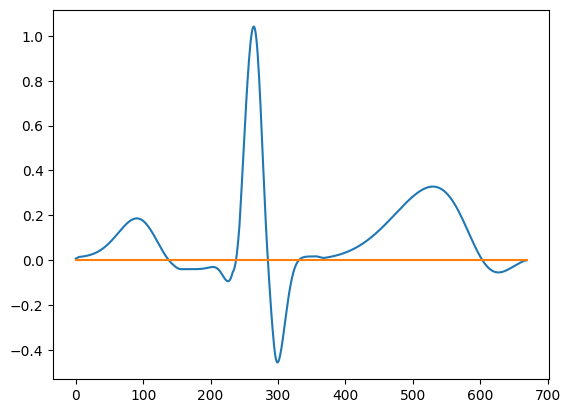

In [20]:
import matplotlib.pyplot as plt 
plt.plot(smooth(signal[150:820],10))
plt.plot(np.zeros(len(signal[150:820])))
# plt.plot(signal1)
plt.show()

In [28]:
sp = smooth(signal[150:820],10)

In [29]:
tp = np.linspace(0,0.6,len(sp))

In [30]:
t = np.linspace(0,0.6,round(0.6*256))

In [31]:
s = np.interp(t,tp,sp)

In [77]:
def addFlat(signal,hearthRate,samplingRate):
    sp = smooth(signal[150:820],10)
    tp = np.linspace(0,0.6,len(sp))
    t = np.linspace(0,0.6,round(0.6*samplingRate))
    s = np.interp(t,tp,sp)

    oneBeatPeriod = 1/(hearthRate/60)
    flatPeriod = oneBeatPeriod - 0.6
    if flatPeriod >=0 : 
        zeros = np.zeros(round(flatPeriod*samplingRate))
        signalAppended = np.append(s,zeros)
    else :
        signalAppended = s
    return signalAppended

def calculateTime(signal, samplingRate):
    time = np.linspace(0,len(signal)/samplingRate,len(signal))
    return time

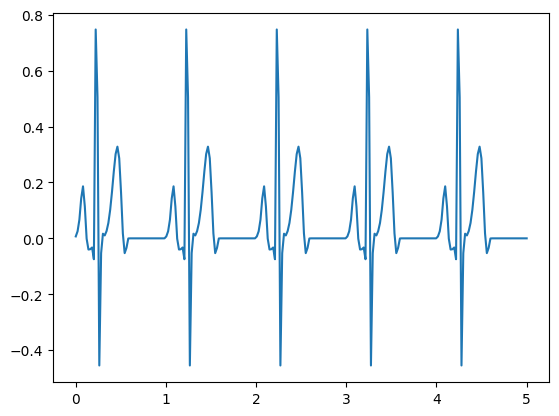

In [86]:
sr = 50
hr = 60
s1 = addFlat(signal,hr,sr)
s5 = np.concatenate([s1 for i in range(5)])
t5 = calculateTime(s5,sr)
plt.plot(t5,s5)

In [88]:
def createMultiplePeriods(periods,hearthRate,samplingRate):
    A = [[-0.313,	-4.680,	1.057,	-0.500,	0.345],
    [0.373	,4.726	,0.690	,0.228	,-0.223]]
    T = [[282.660,	87.180,	30.640,	11.120,	177.252],
        [264.160,	88.000,	15.400,	1.000,	248.027]]
    S = [[	43.672,	19.990,	14.110,	18.060,	92.944],
            [50.571,	20.580,	14.110,	5.676,	46.880]]
    Lengths = [300,88,48,77,429]
    C = [[0.011,-0.04,-0.27,0.017,-0.001],
        [0,0,0,0,0]]
    
    signal = generateBaseEcg(Lengths,A,T,S,C)
    s = addFlat(signal,hearthRate,samplingRate)
    sOut = np.concatenate([s for i in range(periods)])
    tOut = calculateTime(sOut,samplingRate)
    return tOut,sOut
    


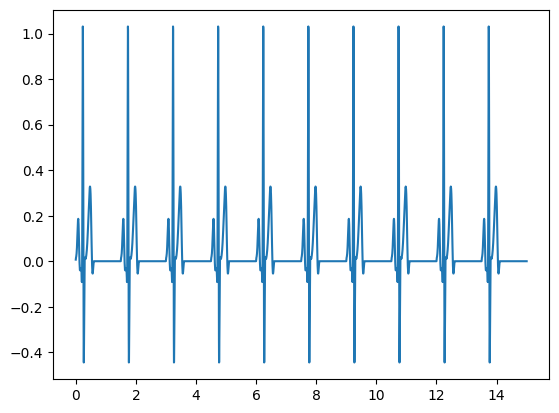

In [90]:
t,s = createMultiplePeriods(10,40,256)
plt.plot(t,s)

In [33]:
len(s)

154

In [ ]:
plt.plot(t,s)

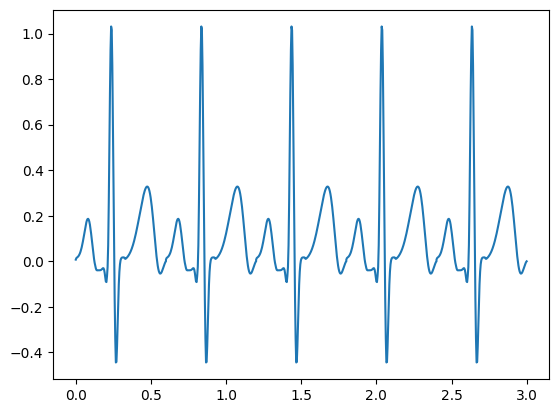

In [39]:
plt.plot(np.concatenate([t+i*0.6 for i in range(5)]),np.concatenate([s for i in range(5)]))
plt.show()

In [7]:
signal10periods = np.concatenate([signal for i in range(5)])
signal10periods = smooth(signal10periods,2)
signalnoisy = signal10periods + np.random.random(len(signal10periods)) * 0


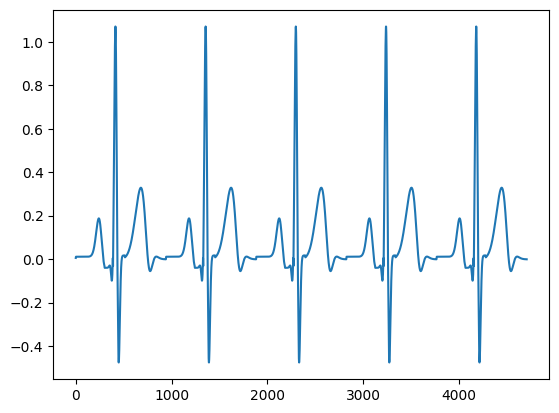

In [8]:
plt.plot(signalnoisy)